# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
# 使用不同Optimizer
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
import itertools

#for lr in LEARNING_RATE:
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    # print("Experiment with LR = %.6f" % (lr))
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    # optimizer = keras.optimizers.RMSprop(lr=lr, decay=1e-6, rho=0.9)
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # exp_name_tag = "exp-lr-%s" % str(lr)
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, whic

50000/50000 [==============================] - 3s 66us/step - loss: 0.8969 - acc: 0.6774 - val_loss: 1.6637 - val_acc: 0.4793
Epoch 41/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.8720 - acc: 0.6889 - val_loss: 1.6385 - val_acc: 0.5139
Epoch 42/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8583 - acc: 0.6926 - val_loss: 1.4564 - val_acc: 0.5181
Epoch 43/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.8466 - acc: 0.6978 - val_loss: 1.7588 - val_acc: 0.4539
Epoch 44/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8356 - acc: 0.7013 - val_loss: 1.7159 - val_acc: 0.4834
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8146 - acc: 0.7093 - val_loss: 1.6509 - val_acc: 0.4962
Epoch 46/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.8018 - acc: 0.7120 - val_loss: 1.5533 - val_acc: 0.5058
Epoch 47/50
50000/50000 [=====================

Epoch 41/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50

50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 4s 82us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 3s 66us/step - loss: 1.2865 - acc: 0.5485 - val_loss: 1.5138 - val_acc: 0.4741
Epoch 43/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2806 - acc: 0.5497 - val_loss: 1.4770 - val_acc: 0.4828
Epoch 44/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2714 - acc: 0.5524 - val_loss: 1.5067 - val_acc: 0.4675
Epoch 45/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2655 - acc: 0.5560 - val_loss: 1.5549 - val_acc: 0.4520: 0
Epoch 46/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2670 - acc: 0.5557 - val_loss: 1.4910 - val_acc: 0.4702
Epoch 47/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2533 - acc: 0.5600 - val_loss: 1.4285 - val_acc: 0.4911
Epoch 48/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.2524 - acc: 0.5592 - val_loss: 1.4152 - val_acc: 0.4912
Epoch 49/50
50000/50000 [==================

Epoch 43/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50

50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 1.7145 - acc: 0.4042 - val_loss: 1.7182 - val_acc: 0.4025
Epoch 45/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7105 - acc: 0.4056 - val_loss: 1.7146 - val_acc: 0.4054
Epoch 46/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7067 - acc: 0.4069 - val_loss: 1.7125 - val_acc: 0.4038
Epoch 47/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.7030 - acc: 0.4083 - val_loss: 1.7074 - val_acc: 0.4058
Epoch 48/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6993 - acc: 0.4095 - val_loss: 1.7065 - val_acc: 0.4063
Epoch 49/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6958 - acc: 0.4097 - val_loss: 1.7000 - val_acc: 0.4094
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6922 - acc: 0.4121 - val_loss: 1.6982 - val_acc: 0.4076
Experiment with LR = 0.001000, Optimizer = <cl

50000/50000 [==============================] - 4s 76us/step - loss: 0.8135 - acc: 0.7080 - val_loss: 1.9552 - val_acc: 0.4597
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.7991 - acc: 0.7118 - val_loss: 2.0221 - val_acc: 0.4685
Epoch 47/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.7869 - acc: 0.7190 - val_loss: 1.9914 - val_acc: 0.4776
Epoch 48/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.7774 - acc: 0.7221 - val_loss: 2.0140 - val_acc: 0.4801
Epoch 49/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.7674 - acc: 0.7235 - val_loss: 1.8351 - val_acc: 0.4843
Epoch 50/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.7478 - acc: 0.7337 - val_loss: 1.9831 - val_acc: 0.4886
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shap

50000/50000 [==============================] - 4s 74us/step - loss: 1.2782 - acc: 0.5571 - val_loss: 1.3829 - val_acc: 0.5096
Epoch 47/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2745 - acc: 0.5573 - val_loss: 1.3813 - val_acc: 0.5111
Epoch 48/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2699 - acc: 0.5601 - val_loss: 1.3873 - val_acc: 0.5109
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2660 - acc: 0.5596 - val_loss: 1.3941 - val_acc: 0.5048
Epoch 50/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2625 - acc: 0.5618 - val_loss: 1.3769 - val_acc: 0.5108
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________

50000/50000 [==============================] - 4s 81us/step - loss: 0.6801 - acc: 0.7568 - val_loss: 1.7157 - val_acc: 0.5153
Epoch 48/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.6612 - acc: 0.7639 - val_loss: 1.6905 - val_acc: 0.5309
Epoch 49/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.6408 - acc: 0.7717 - val_loss: 1.7428 - val_acc: 0.5219
Epoch 50/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.6330 - acc: 0.7734 - val_loss: 1.7581 - val_acc: 0.5245
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________________________

50000/50000 [==============================] - 3s 69us/step - loss: 2.0349 - acc: 0.2846 - val_loss: 2.0345 - val_acc: 0.2817
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.0319 - acc: 0.2866 - val_loss: 2.0316 - val_acc: 0.2839
Epoch 50/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.0290 - acc: 0.2871 - val_loss: 2.0287 - val_acc: 0.2840
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________________

50000/50000 [==============================] - 4s 77us/step - loss: 0.9526 - acc: 0.6694 - val_loss: 1.4053 - val_acc: 0.5199
Epoch 50/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.9443 - acc: 0.6718 - val_loss: 1.4335 - val_acc: 0.4991
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________________

50000/50000 [==============================] - 4s 74us/step - loss: 1.6490 - acc: 0.4308 - val_loss: 1.6626 - val_acc: 0.4237
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params:

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3765 - acc: 0.0937 - val_loss: 2.3730 - val_acc: 0.0929
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.3680 - acc: 0.0943 - val_loss: 2.3647 - val_acc: 0.0917
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3602 - acc: 0.0940 - val_loss: 2.3572 - val_acc: 0.0905
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.3530 - acc: 0.0933 - val_loss: 2.3502 - val_acc: 0.0922
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3464 - acc: 0.0942 - val_loss: 2.3438 - val_acc: 0.0921
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.3402 - acc: 0.0948 - val_loss: 2.3378 - val_acc: 0.0921
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3346 - acc: 0.0954 - val_loss: 2.3323 - val_acc

Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9678 - acc: 0.3177 - val_loss: 1.9314 - val_acc: 0.3199
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8896 - acc: 0.3463 - val_loss: 1.8676 - val_acc: 0.3468
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8406 - acc: 0.3637 - val_loss: 1.8394 - val_acc: 0.3598
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8052 - acc: 0.3751 - val_loss: 1.7977 - val_acc: 0.3701
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7773 - acc: 0.3835 - val_loss: 1.7816 - val_acc: 0.3658
Epoch 7/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7536 - acc: 0.3908 - val_loss: 1.7511 - val_acc: 0.3871
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7336 - acc: 0.3987 - val_loss: 1.7330 - val_acc: 0.3954
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 4s 76us/step - loss: 2.1909 - acc: 0.2345 - val_loss: 2.1844 - val_acc: 0.2375
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.1734 - acc: 0.2449 - val_loss: 2.1690 - val_acc: 0.2436
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1594 - acc: 0.2503 - val_loss: 2.1564 - val_acc: 0.2494
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1476 - acc: 0.2541 - val_loss: 2.1455 - val_acc: 0.2551
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1374 - acc: 0.2569 - val_loss: 2.1360 - val_acc: 0.2580
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1285 - acc: 0.2592 - val_loss: 2.1276 - val_acc: 0.2611
Epoch 9/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1205 - acc: 0.2632 - val_loss: 2.1201 - val_acc: 0.2632
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 83us/step - loss: 1.8181 - acc: 0.3701 - val_loss: 1.7991 - val_acc: 0.3757
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7811 - acc: 0.3813 - val_loss: 1.7714 - val_acc: 0.3789
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7516 - acc: 0.3939 - val_loss: 1.7401 - val_acc: 0.3937
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7251 - acc: 0.4031 - val_loss: 1.7158 - val_acc: 0.4069
Epoch 8/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7042 - acc: 0.4102 - val_loss: 1.7009 - val_acc: 0.4089
Epoch 9/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6839 - acc: 0.4172 - val_loss: 1.6778 - val_acc: 0.4204
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6656 - acc: 0.4254 - val_loss: 1.6662 - val_acc: 0.4234
Epoch 11/50
50000/50000 [==========================

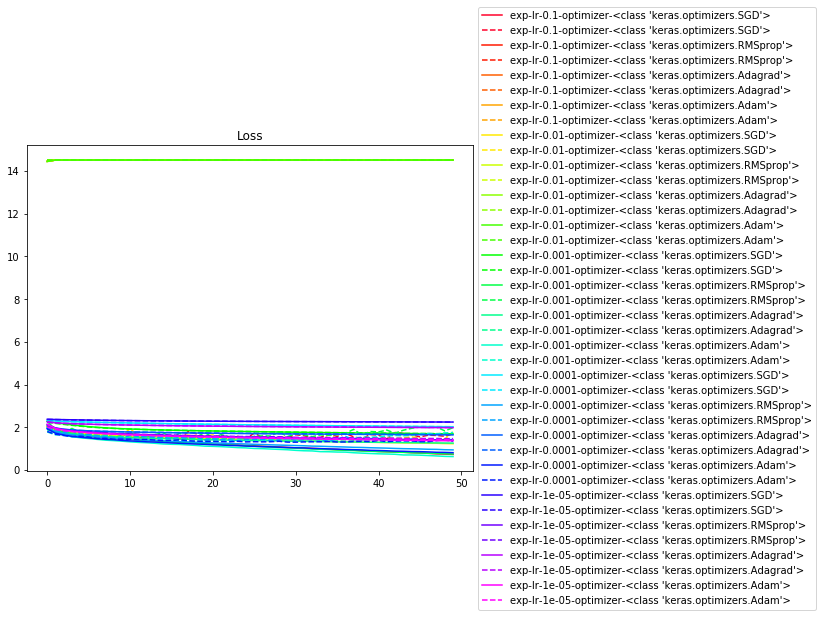

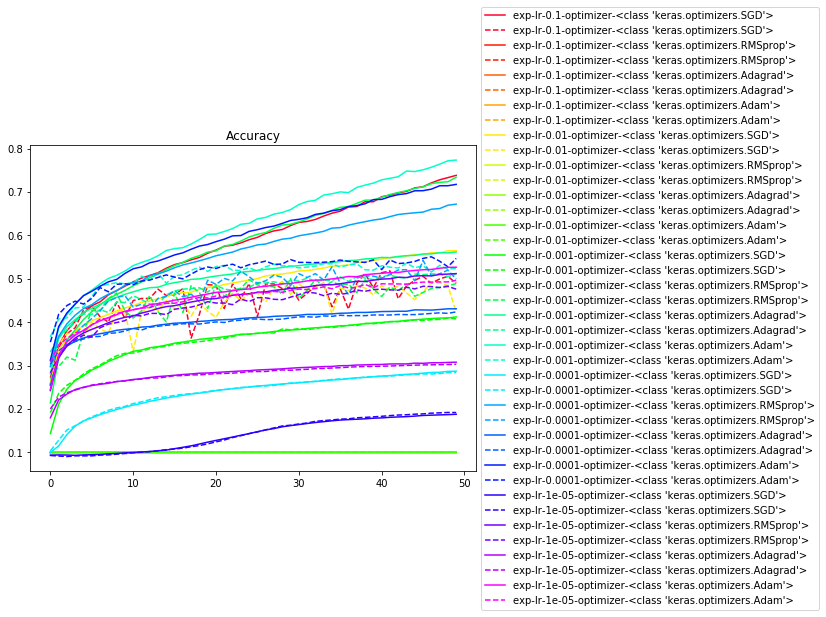

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
# color_bar = ["r", "g", "b", "y", "m", "k"]
# 顏色太多種
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()